Import libraries and Mount Google Drive

In [1]:
import os, time, random
import numpy as np
import pandas as pd
import torch
from tqdm.auto import tqdm
import shutil as sh
from IPython.display import Image, clear_output, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython import display
import cv2
import numpy as np
from google.colab import drive
%matplotlib inline
drive.mount('/content/drive')

Mounted at /content/drive


Install Ultralytics YOLOv8.

In [2]:
%cd '/content/drive/MyDrive/companies'

/content/drive/MyDrive/companies


In [3]:
%%time
!pip install ultralytics==8.0.11
!pip install roboflow --quiet
!pip install roboflow


display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.11 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


CPU times: user 917 ms, sys: 125 ms, total: 1.04 s
Wall time: 22.8 s


Unzip the dataset
(Done)

```
zip_file_path = '/content/drive/MyDrive/vehicles.v6i.yolov8.zip'
target_directory = '/content/drive/MyDrive/companies'
os.system(f'unzip {zip_file_path} -d {target_directory}')
```



In [4]:
zip_file_path = '/content/drive/MyDrive/vehicles.v6i.yolov8.zip'
target_directory = '/content/drive/MyDrive/companies'
os.system(f'unzip {zip_file_path} -d {target_directory}')

256

Training

In [5]:
!yolo task=detect mode=train model=/content/drive/MyDrive/companies/yolov8s.pt data=data.yaml epochs=100 imgsz=640 v5loader=True

Ultralytics YOLOv8.0.11 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/companies/yolov8s.pt, data=data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=Fal

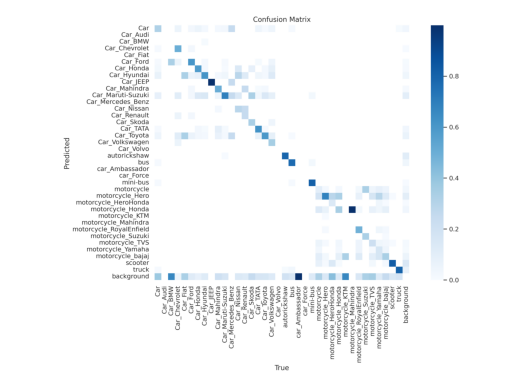

In [6]:
Image = mpimg.imread('/content/drive/MyDrive/companies/runs/detect/train/confusion_matrix.png')
plt.imshow(Image)
plt.axis('off')
plt.show()

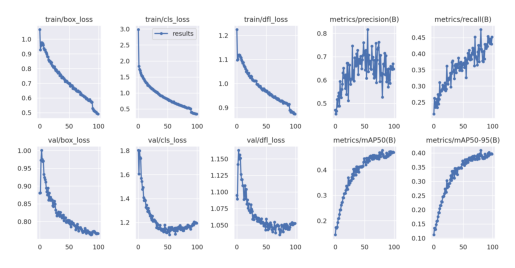

In [7]:
Image = mpimg.imread('/content/drive/MyDrive/companies/runs/detect/train/results.png')
plt.imshow(Image)
plt.axis('off')
plt.show()

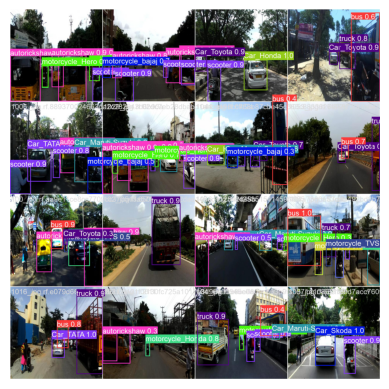

In [8]:
Image = mpimg.imread('/content/drive/MyDrive/companies/runs/detect/train/val_batch0_pred.jpg')
plt.imshow(Image)
plt.axis('off')
plt.show()

Validation

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/companies/runs/detect/train2/weights/best.pt data=/content/drive/MyDrive/dataset/data.yaml

2023-07-06 12:17:02.327093: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-06 12:17:03.189808: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.11 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing... 
Model summary: 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/dataset/valid/labels... 675 images, 0 backgrounds, 0 corrupt: 100% 675/675 [00:02<00:00, 237.33it/s]
val: New cache created: /content/drive/MyDrive/dataset/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 43/43 [00:19<00:00,  2.23it/s]
                   all        675       3087      0.744

Testing

In [10]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/companies/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/companies/test/images

2023-07-11 09:42:04.056130: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-11 09:42:04.952914: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.11 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing... 
Model summary: 168 layers, 11139903 parameters, 0 gradients, 28.5 GFLOPs
image 1/335 /content/drive/MyDrive/companies/test/images/1017_jpg.rf.ee7c847d00636bac86f0b3f0a37b463e.jpg: 640x640 1 bus, 1 motorcycle_bajaj, 1 truck, 16.5ms
image 2/335 /content/drive/MyDrive/companies/test/images/1019_jpg.rf.3c7b70384517f9df33522f0bff32f609.jpg: 640x640 1 Car_TATA, 16.5ms
image 3/335 /content/drive/MyDrive/companies/test/images/1027_jpg.rf.f140bb0fe4fd869ef9a1cec8

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/companies/runs/detect/predict/*.jpg')[:20]:
      display(Image(filename=image_path, width=600))
      print("\n")